# Representation of the Rotation Curves of the Milky Way

Studying and representing the rotation curves of a galaxy is a quite interesting exercise since it not only provides us with relevant information about the distribution of a galaxy and the dynamics of each of its components (bulge, disk, and halo) as a function of radius but also allows us to infer the presence of dark matter.

In this way, we will use the output of a program called GalactICS, which provides us with the velocities and positions of a set of N-particles simulating the Milky Way based on certain chosen parameters. This model was proposed by Kuijken et al. 1995, which has shown similarity with the results of observed measurements of the Milky Way.

Regarding GalactICS, its explanation is not necessary for the study to be conducted here; we only need the output of the simulation solving the N-body problem that it carries out, resulting in a file called *freqdbh.dat* with the data needed for this simulation.

As for the packages, we only use *numpy* to perform certain mathematical operations due to the nature of the parameters provided by the program, and *matplotlib* for graphical representation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Once the two mentioned packages are imported, we define the *freqdbh.dat* file within our code. Along with some necessary velocity and distance scale parameters due to the data output format of the program, we define the variables we will be working with: galactocentric radius (*radius*), angular velocity of the halo (*omegah*), total circular velocity (*vct*), and bulge circular velocity (*vb*).

In [9]:
# Data File. Contains outputs from GalactICS
infile = "/home/sergio/Escritorio/Master/Física de Galaxias/Práctica 2/A/freqdbh_A.dat"  

velscale = 220  # vel Milky Way (km/s)
dist = 4.5  # Scale factor of the Milky Way's disk (kpc)

data = np.genfromtxt(infile, comments='#')[:, 0:]

radius = data[:, 0]
omegah = data[:, 1] # Halo angular velocity
vct = data[:, 4] # Total circular velocity
vb = data[:, 5] # Bulge circular velocity

To represent the rotation curves of all components of the Milky Way, we need their circular (tangential) velocities. Since we only have information about the total and bulge velocities, we must use the definition of total velocity as the quadratic sum of the velocities of the other components.

Thus, first, we define our total circular velocity (*vctot*) and bulge circular velocity (*vcb*) by multiplying their respective previous velocities by the velocity scale factor to express them in km/s. Regarding the circular velocity of the halo, since we know the angular velocity, we simply multiply it by the radius and the velocity scale factor.
This way, we can find the circular velocity of the disk by solving for it in the quadratic sum of the total velocity.

In [3]:
vctot = vct * velscale
vcb = vb * velscale
vhalo = omegah * radius * velscale
disk = np.sqrt(vctot**2 - vcb**2 - vhalo**2)

Once our four velocities are defined, we simply represent them on the same graph using *matplotlib*.

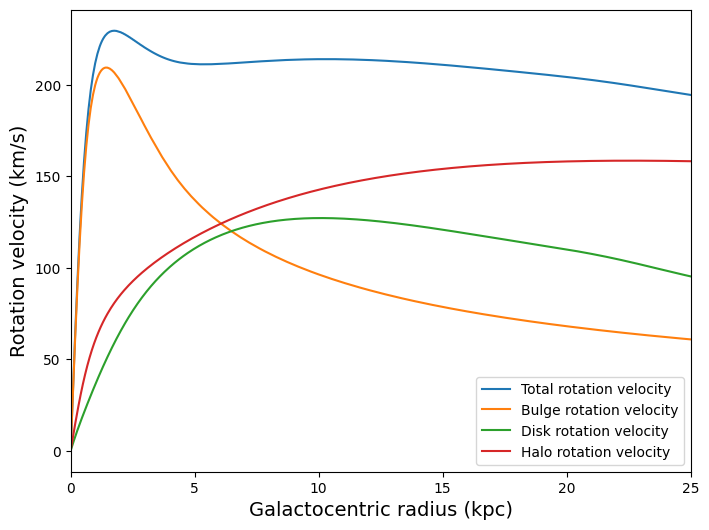

In [4]:
plt.figure(figsize=(8,6))
plt.plot(radius * dist, vctot)
plt.xlabel('Galactocentric radius (kpc)', fontsize=14)
plt.ylabel('Rotation velocity (km/s)', fontsize=14)
plt.xlim(0, 25)
plt.plot(radius * dist, vcb)
plt.plot(radius * dist, disk)
plt.plot(radius * dist, vhalo)
plt.legend(['Total rotation velocity', 'Bulge rotation velocity', 'Disk rotation velocity', 'Halo rotation velocity', ])

plt.show()

Observing the final result, we can see how each component of the galaxy contributes to the total velocity curve. In positions close to the galactic center, the predominant component is the bulge. However, as we move away from this center, the disk and the halo become more noticeable, significantly reducing the contribution of the bulge. As we move towards the outer regions of the galaxy, we find logical results regarding the bulge and the disk, showing a gradual reduction. However, the contribution of the halo increases, resulting in a total rotation curve that remains constant across the radius against intuition. This is what is known as the 'Dark Matter problem,' which Vera Rubin discovered in her observations, leading to the hypothesis of the existence of invisible matter that exerts a significant gravitational interaction.

By using the Universal Law of Gravitation, it is possible to relate the previously calculated velocities to the mass of each component concerning the radius. This gives us the opportunity to visualize the results in a more intuitive way and see the difference between the contributions of each component.

For ease of result comparison, the gravitational constant (*G*) has been used in units of kpc and solar masses, commonly used in astrophysics.

In [7]:
G = 4.3009172e-6   # Gravitational constant (kpc km^2 / M_sun s^2)

# Calculate the cummulative mass for each component
masa_acum_total= (vctot**2 * (radius * dist)) / G
masa_acum_bulbo = (vcb**2 * (radius * dist))/ G
masa_acum_disco = (disk**2 * (radius * dist)) / G
masa_acum_halo = (vhalo**2 * (radius * dist))/ G

Once the mass variables for each of the components of our galaxy are defined, we simply represent them on the same graph for easy comparison.

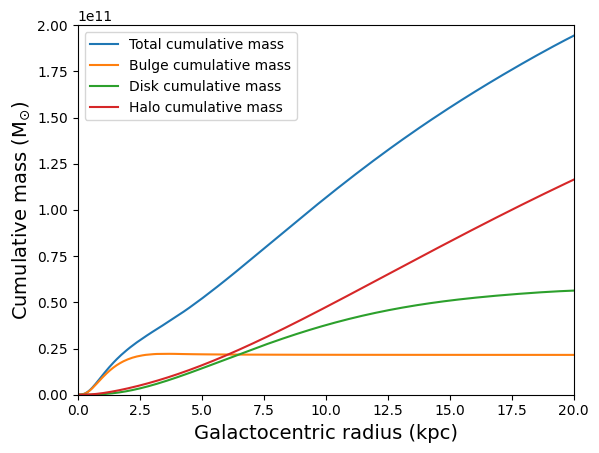

In [8]:
plt.plot(radius * dist, masa_acum_total, label='Total cumulative mass')
plt.plot(radius * dist, masa_acum_bulbo, label='Bulge cumulative mass')
plt.plot(radius * dist, masa_acum_disco, label='Disk cumulative mass')
plt.plot(radius * dist, masa_acum_halo, label='Halo cumulative mass')
plt.xlabel('Galactocentric radius (kpc)', fontsize=14)
plt.ylabel(r'Cumulative mass (M$_{\odot}$)', fontsize=14)
plt.xlim(0, 20)
plt.ylim(0, 2e11)
plt.legend()
plt.show()

Observing the previous representation, we can see consistency with the results explained earlier, where the mass of the halo stands out, showing a linearly increasing relationship along the galactocentric radius in contrast to the bulge or the disk.